In [1]:
'''Code for fine-tuning Inception V3 for a new task.

Start with Inception V3 network, not including last fully connected layers.

Train a simple fully connected layer on top of these.


'''

import numpy as np
import pandas as pd
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
import keras.applications.inception_v3 as inception
import final_models.cnn_d as OurNetwork
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
IMSIZE = (196, 196)

PHOTO_PATH = r"/Users/jundali/Desktop/katkam-scaled"

def showImg(filename):
    img = image.load_img(PHOTO_PATH+"/"+filename, target_size=IMSIZE)
    x = image.img_to_array(img)
    plt.imshow(img)
    plt.show()

Using TensorFlow backend.


In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")
weather_array = list(map(lambda x:x.split(',') ,cleaned_data["Mapped"].values))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(weather_array)
cleaned_data["Y"] = list(Y)

cleaned_data
print(mlb.classes_)

['Clear' 'Cloudy' 'Fog' 'Rain' 'Snow']


In [3]:
cleaned_data

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"


In [4]:
# cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]

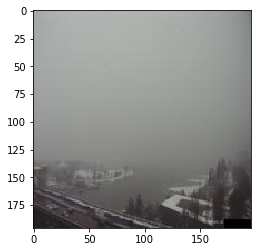

In [5]:
showImg("katkam-20161209130000.jpg")

In [6]:
#
def balance_data (df):
    clear_days_mask = df.apply(lambda x: x["Y"][0]==1,axis = 1)
    clear_days = df[clear_days_mask]
    non_clear_days = df[~clear_days_mask].sample(len(clear_days))
    final_data = clear_days.append(non_clear_days)
    final_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
    final_data = final_data.sample(frac=1)
    return final_data
final_data = balance_data(cleaned_data)

In [7]:
def sub_balanced_data(df):
    foggy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]
    rainy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][3]==1,axis = 1)]
    snowy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][4]==1,axis = 1)]
    just_cloudy_days  = cleaned_data[cleaned_data.apply(lambda x: (x["Y"][2]==0) and (x["Y"][3]==0) and (x["Y"][4]==0),axis = 1)]
    samples_per_label = len(snowy_days)
    final_data = foggy_days.sample(samples_per_label).append(rainy_days.sample(samples_per_label))
    final_data = final_data.append(snowy_days.sample(samples_per_label))
    final_data = final_data.append(just_cloudy_days.sample(samples_per_label))
    return final_data
# cleaned_data["Y3"] = cleaned_data.apply(lambda x: x["Y"],axis = 1)
cleaned_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
cleaned_data["Y3"] = cleaned_data.apply(lambda x: list(x["Y"])[2:5],axis = 1)
final_data = sub_balanced_data(cleaned_data)
train_test_mask = np.random.rand(len(final_data)) < 0.8
train_data = final_data[train_test_mask]
test_data = final_data[~train_test_mask]

In [8]:
base_model = OurNetwork.network(classes = 2)
for layer in base_model.layers:
    layer.trainable = False
x = Flatten(name='sub_flatten')(base_model.get_layer('block3_pool').output)
x = Dense(32, activation='relu', name='sub_fc1')(x)
x = Dropout(0.3)(x)
sub_predictions = Dense(3, activation='sigmoid', name='sub_predictions')(x)
predictions = (base_model.get_layer('predictions').output)
model = Model(inputs=base_model.input, outputs=[predictions, sub_predictions])
model.compile(loss='binary_crossentropy', optimizer="adam", loss_weights={'predictions': 0, 'sub_predictions': 1}, metrics=['accuracy'])
for layer in model.layers:
    layer.trainable = False
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 196, 196, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 196, 196, 16)  448         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Conv2D)            (None, 196, 196, 16)  2320        block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 98, 98, 16)    0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [9]:

#print(val_files)
# np.random.seed(0)
img_datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

def my_load_img(img_path,img_datagen,size):
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = img_datagen.random_transform(x)
    x = img_datagen.standardize(x)
    return x
def my_img_generator(df,img_datagen,batch_size):
    index = 0
    count = 0
    img_datas=[]
    img_labels=[]
    img_sub_labels =[]
    while 1:
        # create numpy arrays of input data
        # and labels, from each line in the file
        item = df.iloc[index]
        if count < batch_size:
            img_datas.append(my_load_img(PHOTO_PATH+"/"+item["Filename"],img_datagen,IMSIZE))
#             [np.array(one_hot_labels),np.array(img_bboxes)]
            img_labels.append(item["Y2"])
            img_sub_labels.append(item["Y3"])

#             img_labels.append([np.array(item["Y2"]),np.array(item["Y3"])])

            index=(index+1)%df.shape[0]
            count+=1
        else:
            count=0
            yield (np.array(img_datas),[np.array(img_labels),np.array(img_sub_labels)])
                # yield (np.array(img_datas),np.array(img_bboxes))
#             else:
#                 yield (np.array(img_datas),np.array(one_hot_labels))
            img_datas = []
            img_labels = []
            img_sub_labels =[]
            img_bboxes=[]
#             random.shuffle(files)
            

batch_size=64

my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
my_test_generator = my_img_generator(test_data,img_datagen,batch_size)


In [10]:
# Data training
# model.load_weights('final_models/sub_cnn.h5',by_name=True)
# model.save_weights('cnn_c.h5') 

# for i in range(0):
#     '''Refresh data'''
#     final_data = sub_balanced_data(cleaned_data)
#     train_test_mask = np.random.rand(len(final_data)) < 0.8
#     train_data = final_data[train_test_mask]
#     test_data = final_data[~train_test_mask]
#     my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
#     my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
    
#     model.fit_generator(
#             my_train_generator,
#             steps_per_epoch = 5,
#             epochs = 10,
#             validation_data = my_test_generator,
#             verbose = 2,
#             validation_steps = 5)
#     model.save_weights('new_sub_cnn.h5') 


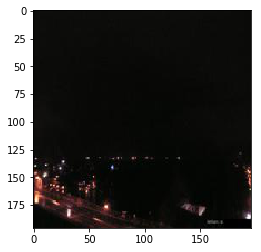

Predicted: [array([[  9.63397270e-06,   9.99992490e-01]], dtype=float32), array([[ 0.62251699,  0.68031538,  0.19520332]], dtype=float32)]


In [11]:
img_path = PHOTO_PATH+"/"+"katkam-20161126060000.jpg"
model.load_weights('final_models/sub_cnn.h5') 

img = image.load_img(img_path , target_size=IMSIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = inception.preprocess_input(x)
# x = image.img_to_array(img)
# x = img_datagen.random_transform(x)
x = img_datagen.standardize(x)
preds = model.predict(x)
plt.imshow(img)
plt.show()
print('Predicted:', preds)
# [Clear, Cloudy, Fog, Rain, Snow]

In [12]:
pics = cleaned_data.loc[cleaned_data["Mapped"].str.contains("Fog")]

def listPhotots(photos):
    for p in photos:
        plt.figure(figsize=(8,8))
        img = image.load_img(PHOTO_PATH+"/"+ p, target_size=IMSIZE)
        plt.imshow(img)
        plt.show()
        print(p)
# listPhotots(cleaned_data[cleaned_data["Mapped"].str.contains("Snow")]["Filename"].values)

cleaned_data[(cleaned_data["Mapped"].str.contains("Snow"))]

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Y2,Y3
1100,2016-12-05 06:00:00,2016,12,5,06:00,katkam-20161205060000.jpg,"Rain,Cloudy,Snow",Snow Showers,"[0, 1, 0, 1, 1]","[0, 1]","[0, 1, 1]"
1101,2016-12-05 07:00:00,2016,12,5,07:00,katkam-20161205070000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1102,2016-12-05 08:00:00,2016,12,5,08:00,katkam-20161205080000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1103,2016-12-05 09:00:00,2016,12,5,09:00,katkam-20161205090000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1104,2016-12-05 10:00:00,2016,12,5,10:00,katkam-20161205100000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1105,2016-12-05 11:00:00,2016,12,5,11:00,katkam-20161205110000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1106,2016-12-05 12:00:00,2016,12,5,12:00,katkam-20161205120000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1123,2016-12-09 07:00:00,2016,12,9,07:00,katkam-20161209070000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1124,2016-12-09 08:00:00,2016,12,9,08:00,katkam-20161209080000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"
1125,2016-12-09 09:00:00,2016,12,9,09:00,katkam-20161209090000.jpg,"Snow,Cloudy",Snow,"[0, 1, 0, 0, 1]","[0, 1]","[0, 0, 1]"


In [35]:
def batchPredict(imageNames):
    result = []
    for filename in imageNames:
        img_path = PHOTO_PATH+"/"+filename
        img = image.load_img(img_path , target_size=IMSIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = img_datagen.standardize(x)
        preds = model.predict(x)
        result.append([preds[0].reshape(2),preds[1].reshape(3)])
    return result

def get_Y3_Label(preds):
    y3_label = ""
    if(preds[0][0]>0.6):
        return "Clear"
    else:
        if(preds[1][0]>0.5):
            y3_label+="Fog"
        if(preds[1][1]>0.5):
            y3_label+=" Rain"
        if(preds[1][2]>0.5):
            y3_label+=" Snow"
        if(y3_label == ""):
            y3_label="Cloudy"
    return y3_label

def get_predicted_y(preds):
    y = [0, 0, 0, 0,0]
    if(preds[0][0]>0.6):
        y[0] = 1
    else:
        flag = False
        if(preds[1][0]>0.5):
            y[2] = 1
            flag = True
        if(preds[1][1]>0.5):
            y[3]=1
            y[1] = 1
            flag = True
        if(preds[1][2]>0.5):
            y[4]=1
            y[1] = 1
            flag = True
        if (~flag):
            y[1]=1
    return y

# cleaned_data["Predict_combined"] = batchPredict(cleaned_data["Filename"].values)
cleaned_data["Predict_Y2_Label"] = cleaned_data["Predict_combined"].apply(lambda x: "Clear" if x[0][0]>0.6 else "Non_Clear")
cleaned_data["Predict_Y3_Label"] = cleaned_data["Predict_combined"].apply(lambda x: get_Y3_Label(x))
cleaned_data["Predict_Y"] = cleaned_data["Predict_combined"].apply(lambda x: get_predicted_y(x))




In [14]:
cleaned_data.sample(10)

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Y2,Y3,Predict_combined,Predict_Y2_Label,Predict_Y3_Label,Predict_Y
121,2016-06-24 16:00:00,2016,6,24,16:00,katkam-20160624160000.jpg,Cloudy,Cloudy,"[0, 1, 0, 0, 0]","[0, 1]","[0, 0, 0]","[[3.41302e-09, 1.0], [0.00244084, 0.293782, 1....",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]"
278,2016-07-23 19:00:00,2016,7,23,19:00,katkam-20160723190000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[1, 0]","[0, 0, 0]","[[0.999845, 0.00015164], [0.000129327, 0.00047...",Clear,N/A,"[1, 0, 0, 0, 0]"
1670,2017-03-24 12:00:00,2017,3,24,12:00,katkam-20170324120000.jpg,"Rain,Cloudy",Rain Showers,"[0, 1, 0, 1, 0]","[0, 1]","[0, 1, 0]","[[0.000152124, 0.999846], [0.0215537, 0.934404...",Non_Clear,Rain,"[0, 1, 0, 1, 0]"
2143,2017-06-04 10:00:00,2017,6,4,10:00,katkam-20170604100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0, 1]","[0, 0, 0]","[[0.462186, 0.536912], [0.0015687, 0.0448239, ...",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]"
735,2016-10-14 06:00:00,2016,10,14,06:00,katkam-20161014060000.jpg,"Rain,Cloudy",Heavy Rain,"[0, 1, 0, 1, 0]","[0, 1]","[0, 1, 0]","[[7.48311e-09, 1.0], [0.721227, 0.760418, 0.14...",Non_Clear,Fog Rain,"[0, 1, 1, 1, 0]"
2233,2017-06-18 11:00:00,2017,6,18,11:00,katkam-20170618110000.jpg,"Rain,Cloudy,Fog","Drizzle,Fog","[0, 1, 1, 1, 0]","[0, 1]","[1, 1, 0]","[[4.39896e-07, 1.0], [0.302897, 0.919632, 0.10...",Non_Clear,Rain,"[0, 1, 0, 1, 0]"
2060,2017-05-21 10:00:00,2017,5,21,10:00,katkam-20170521100000.jpg,Cloudy,Cloudy,"[0, 1, 0, 0, 0]","[0, 1]","[0, 0, 0]","[[0.0876905, 0.911511], [0.0243306, 0.083106, ...",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]"
1394,2017-02-06 07:00:00,2017,2,6,07:00,katkam-20170206070000.jpg,"Rain,Cloudy,Snow",Snow Showers,"[0, 1, 0, 1, 1]","[0, 1]","[0, 1, 1]","[[1.488e-05, 0.999987], [0.084554, 0.495165, 0...",Non_Clear,Snow,"[0, 1, 0, 0, 1]"
970,2016-11-15 13:00:00,2016,11,15,13:00,katkam-20161115130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0, 1]","[0, 0, 0]","[[5.23087e-05, 0.999951], [0.0412628, 0.457838...",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]"
576,2016-09-18 13:00:00,2016,9,18,13:00,katkam-20160918130000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[1, 0]","[0, 0, 0]","[[0.98923, 0.0106838], [0.000327595, 0.0008481...",Clear,N/A,"[1, 0, 0, 0, 0]"


In [38]:
cleaned_data.sample(10)[["Filename","Weather","Predict_Y2_Label","Predict_Y3_Label"]]

,Filename,Weather,Predict_Y2_Label,Predict_Y3_Label
1020,katkam-20161124060000.jpg,Rain,Non_Clear,Rain
832,katkam-20161026130000.jpg,Rain,Non_Clear,Rain
37,katkam-20160612070000.jpg,Mostly Cloudy,Non_Clear,Cloudy
2122,katkam-20170531200000.jpg,Rain Showers,Non_Clear,Cloudy
1480,katkam-20170219130000.jpg,Rain Showers,Non_Clear,Rain
1225,katkam-20161226080000.jpg,Snow,Non_Clear,Snow
819,katkam-20161024170000.jpg,Moderate Rain,Non_Clear,Rain
1092,katkam-20161203140000.jpg,Rain Showers,Non_Clear,Rain
621,katkam-20160925070000.jpg,Cloudy,Non_Clear,Rain
998,katkam-20161120150000.jpg,Rain,Non_Clear,Rain


In [30]:

accuracy_score(np.stack(cleaned_data["Y"].values),np.stack(cleaned_data["Predict_Y"].values))
# np.stack(cleaned_data["Predict_Y"].values)[20:50]

0.71975088967971534